In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
#Import libraries related to modeling
from sklearn.linear_model import LinearRegression as LR

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train = train.set_index('PassengerId')

In [5]:
test = test.set_index('PassengerId')

In [6]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
def correlation(data=train):
    #Correlation matrix
    cor = data.corr()

    #Set the height and width of the plot
    f, ax = plt.subplots(figsize=(7,5))
    sbn.heatmap(cor,     #Correlation Matrix
                mask=np.zeros_like(cor,dtype=np.bool),    #Create a fixed number of slots under the whole pane
                cmap=sbn.diverging_palette(220,70,as_cmap=True),    #Set the colors in the correlation matrix
                square = True, ax=ax)

## Missing Values

In [8]:
def findMissing(data):
    missing_values = pd.DataFrame({'Features': data.columns,
                                   'Missing Values': data.isna().sum(),
                                   'Missing Value Percentage': data.isna().sum()*100/data.shape[0]},
                                   columns=['Features', 'Missing Values', 'Missing Value Percentage'])
    missing_values = missing_values.set_index('Features')
    missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
    return(missing_values)

In [9]:
findMissing(train).head()

,Missing Values,Missing Value Percentage
Features,,
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Survived,0,0.000000
Pclass,0,0.000000


In [10]:
#Drop Cabin Column since it has more than 30% missing values.

train = train.drop('Cabin', axis=1)

In [11]:
'Cabin' in train.columns

False

ValueError: max must be larger than min in range parameter.

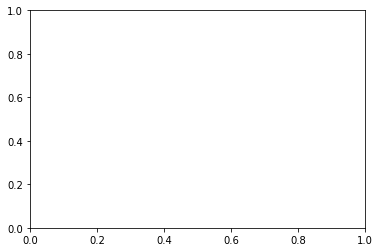

In [12]:
#Use an imputation strategy for Age column
#Check the distribution of Age column
plt.hist(train['Age'])

In [28]:
#Find the maximum and minimum age
np.max(np.array(train['Age'])), np.min(np.array(train['Age']))

(nan, nan)

### Replace NA values by -1

In [49]:
def replace_NA(col, data=train):
    data.loc[data[col].isna(), col] = -1

In [50]:
list(map(replace_NA, ['Age', 'Embarked']))

[None, None]

In [25]:
def plotting(var, data=train):
    plt.boxplot(data[var])
    plt.show()

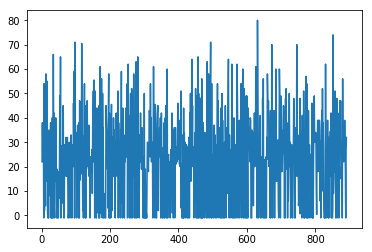

In [51]:
plt.plot(train.index, train['Age'])

In [29]:
from statsmodels.graphics.gofplots import qqplot

In [34]:
help(qqplot)

Help on function qqplot in module statsmodels.graphics.gofplots:

qqplot(data, dist=<scipy.stats._continuous_distns.norm_gen object at 0x7ffa82ecdb38>, distargs=(), a=0, loc=0, scale=1, fit=False, line=None, ax=None, **plotkwargs)
    Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
    
    Can take arguments specifying the parameters for dist or fit them
    automatically. (See fit under Parameters.)
    
    Parameters
    ----------
    data : array-like
        1d data array
    dist : A scipy.stats or statsmodels distribution
        Compare x against dist. The default
        is scipy.stats.distributions.norm (a standard normal).
    distargs : tuple
        A tuple of arguments passed to dist to specify it fully
        so dist.ppf may be called.
    loc : float
        Location parameter for dist
    a : float
        Offset for the plotting position of an expected order statistic, for
        example. The plotting positions are given by (i - a)/(nobs

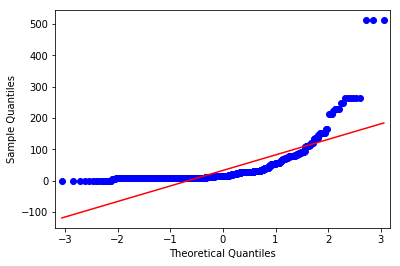

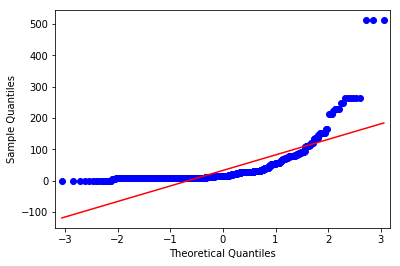

In [52]:
qqplot(train['Fare'], line='s')

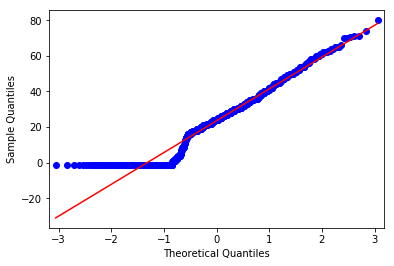

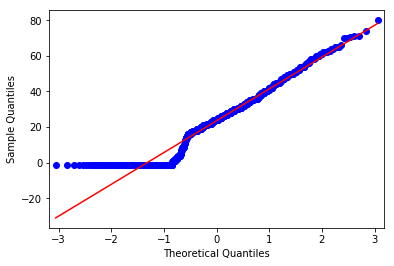

In [53]:
qqplot(train['Age'], line='s')

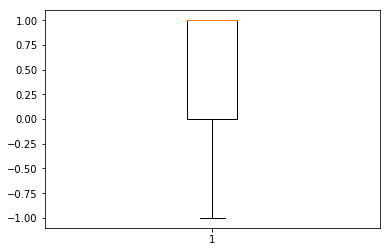

In [54]:
plotting('Embarked')

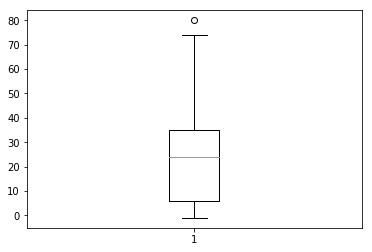

In [55]:
plotting('Age')

## Analyze the Number of Parents/Childeren Onboard

In [63]:
#Find the percentage of parents/children not survived
parents_children_not_survived = train.loc[(train['Parch']==1)&(train['Survived']==0), :]

In [64]:
#Find the percentage of parents/children survived
parents_children_survived = train.loc[(train['Parch']==1)&(train['Survived']==1), :]

In [66]:
parents_children_not_survived.shape[0] + parents_children_survived.shape[0] == train.shape[0]

False

In [68]:
#Find the number of unique values in 'Parch'
np.unique(np.array(train['Parch']))

array([0, 1, 2, 3, 4, 5, 6])

## Categorical Values

In [21]:
#Convert categorical values to numerical values
#Sex Male --- 1, Female --- 0
#Embarked S --- 1, C ---- 0
Sex = {'male':1, 'female':0}
Embarked = {'S':1, 'C':0}


In [23]:
train['Sex'] = train['Sex'].map(Sex)
train['Embarked'] = train['Embarked'].map(Embarked)

In [24]:
train[['Sex', 'Embarked']]

,Sex,Embarked
PassengerId,,
1,1,1.0
2,0,0.0
3,0,1.0
4,0,1.0
5,1,1.0
6,1,NaN
7,1,1.0
8,1,1.0
9,0,1.0


In [41]:
train.shape

(891, 10)

## Cleaning the Test Dataset

In [103]:
test.shape

(418, 10)

In [104]:
#Drop Cabin column from test
test = test.drop('Cabin', axis=1)

In [105]:
test.shape

(418, 9)

In [107]:
test.isna().sum()*100/test.shape[0]

Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.239234
Embarked     0.000000
dtype: float64

In [108]:
#Drop the rows having missing values 
test = test.dropna()

In [6]:
relation = train.loc[:,'Age'].corr(train.loc[:,'Survived'])

In [7]:
relation

-0.077221094572177365

In [ ]:
#

In [15]:
cor

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5,1,'Comparison Age, Pclass and Fare')

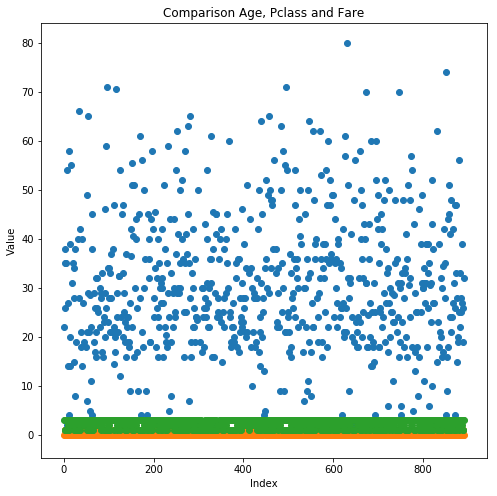

In [18]:
#Plot Age, Pclass and Fare
f, ax = plt.subplots(figsize=(8,8))
X_axis = train.index
ax.scatter(X_axis, train['Age'])
ax.scatter(X_axis, train['Survived'])
ax.scatter(X_axis, train['Pclass'])

ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.set_title("Comparison Age, Pclass and Fare")